In [187]:
from fastai.tabular.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
df = pd.read_csv('../datasets/final_df/crime_total.csv') #read in dataframe

In [390]:
df.dispatch_date = pd.to_datetime(df.dispatch_date) # make categoricals
df.zipcode = df.zipcode.astype(int)
df.year = df.year.astype(int)
df['month']= df.dispatch_date.dt.month.astype(int)
#df.to_csv('../datasets/final_df/crime_total.csv',index=False)

In [421]:
df['time_delta'] = df.index.values

In [422]:
df.columns

Index(['zipcode', 'dispatch_date',
       'text_general_code_Aggravated Assault Firearm',
       'text_general_code_Aggravated Assault No Firearm',
       'text_general_code_All Other Offenses', 'text_general_code_Arson',
       'text_general_code_Burglary Non-Residential',
       'text_general_code_Burglary Residential',
       'text_general_code_DRIVING UNDER THE INFLUENCE',
       'text_general_code_Disorderly Conduct',
       'text_general_code_Embezzlement',
       'text_general_code_Forgery and Counterfeiting',
       'text_general_code_Fraud', 'text_general_code_Gambling Violations',
       'text_general_code_Homicide - Criminal',
       'text_general_code_Homicide - Gross Negligence',
       'text_general_code_Homicide - Justifiable ',
       'text_general_code_Liquor Law Violations',
       'text_general_code_Motor Vehicle Theft',
       'text_general_code_Narcotic / Drug Law Violations',
       'text_general_code_Offenses Against Family and Children',
       'text_general_cod

In [439]:
dls = TabularDataLoaders.from_df(df, y_names="num_crimes",
    cat_names = ['zipcode'],
    cont_names = ['month','num_art','num_fm','num_parks','num_landmark','num_housingcouncil','num_nac_office','num_nac',\
                  'year','num_pools','num_spraygrounds','num_playstreets','num_playgrounds','num_schools',\
                  'num_community_programs','ACTIVE_O','TYPE_SPECIFIC_ARCHDIOCESE','TYPE_SPECIFIC_CHARTER',\
                  'TYPE_SPECIFIC_CONTRACTED','TYPE_SPECIFIC_DISTRICT','TYPE_SPECIFIC_PRIVATE',\
                  'num_tuition_tax','amt_tuition_tax','num_education_credit','amt_education_credit'],
    procs = [Categorify, FillMissing, Normalize])

In [440]:
dls

In [441]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))


In [442]:
splits

((#18066) [21372,19897,775,21349,2272,13866,20996,8660,8000,15821...],
 (#4516) [9238,6394,3918,21728,12641,426,8156,18052,14837,19977...])

In [443]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],cat_names = ['zipcode'],
                   cont_names = ['month','num_art','num_fm','num_parks','num_landmark','num_housingcouncil','num_nac_office','num_nac',\
                  'year','num_pools','num_spraygrounds','num_playstreets','num_playgrounds','num_schools',\
                  'num_community_programs','ACTIVE_O','TYPE_SPECIFIC_ARCHDIOCESE','TYPE_SPECIFIC_CHARTER',\
                  'TYPE_SPECIFIC_CONTRACTED','TYPE_SPECIFIC_DISTRICT','TYPE_SPECIFIC_PRIVATE',\
                  'num_tuition_tax','amt_tuition_tax','num_education_credit','amt_education_credit'],
                   y_names="num_crimes", splits=splits)


In [444]:
dls = to.dataloaders(bs=64)

In [445]:
dls.show_batch()

,zipcode,num_schools_na,ACTIVE_O_na,TYPE_SPECIFIC_ARCHDIOCESE_na,TYPE_SPECIFIC_CHARTER_na,TYPE_SPECIFIC_CONTRACTED_na,TYPE_SPECIFIC_DISTRICT_na,TYPE_SPECIFIC_PRIVATE_na,num_tuition_tax_na,amt_tuition_tax_na,num_education_credit_na,amt_education_credit_na,month,num_art,num_fm,num_parks,num_landmark,num_housingcouncil,num_nac_office,num_nac,year,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,num_schools,num_community_programs,ACTIVE_O,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,num_tuition_tax,amt_tuition_tax,num_education_credit,amt_education_credit,num_crimes
0,19143,False,False,False,False,False,False,False,False,False,False,False,10.0,9.999999e-01,3.000000e+00,22.0,141.999999,1.402009e-08,-5.359310e-09,-5.359310e-09,2017.0,3.000000e+00,5.495082e-09,2.173649e-09,1.800000e+01,21.0,189.000001,21.0,21.0,21.0,21.0,21.0,21.0,-1.425545e-07,-0.000003,59.999997,7.800000e+01,556.0
1,19128,False,False,False,False,False,False,False,False,False,False,False,5.0,1.574252e-07,2.000000e+00,23.0,105.000000,1.000000e+00,-5.359310e-09,-5.359310e-09,2014.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,12.0,131.000000,12.0,12.0,12.0,12.0,12.0,12.0,8.000000e+01,189.999995,249.999999,3.940000e+02,170.0
2,19154,False,False,False,False,False,False,False,False,False,False,False,10.0,1.574252e-07,-2.544368e-08,14.0,135.999999,1.402009e-08,-5.359310e-09,-5.359310e-09,2017.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,11.0,150.000000,11.0,11.0,11.0,11.0,11.0,11.0,-1.425545e-07,-0.000003,0.000004,-4.596073e-07,0.0
3,19133,False,False,False,False,False,False,False,True,True,True,True,3.0,5.000000e+00,1.000000e+00,13.0,83.999999,1.000000e+00,-5.359310e-09,-5.359310e-09,2013.0,3.496407e-09,5.495082e-09,2.173649e-09,1.100000e+01,10.0,114.999999,10.0,10.0,10.0,10.0,10.0,10.0,2.000000e+01,43.000001,109.999998,1.280000e+02,456.0
4,19138,False,False,False,False,False,False,False,False,False,False,False,4.0,1.574252e-07,1.000000e+00,5.0,89.999999,1.402009e-08,-5.359310e-09,-5.359310e-09,2016.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,13.0,95.999999,13.0,13.0,13.0,13.0,13.0,13.0,-1.425545e-07,-0.000003,59.999997,8.400000e+01,235.0
5,19137,False,False,False,False,False,False,False,False,False,False,False,12.0,1.574252e-07,-2.544368e-08,3.0,294.000005,1.402009e-08,-5.359310e-09,-5.359310e-09,2016.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,4.0,297.000004,4.0,4.0,4.0,4.0,4.0,4.0,-1.425545e-07,-0.000003,50.000005,2.200000e+01,102.0
6,19127,False,False,False,False,False,False,False,True,True,True,True,5.0,1.574252e-07,1.000000e+00,6.0,25.999997,1.402009e-08,-5.359310e-09,-5.359310e-09,2007.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,2.0,33.000003,2.0,2.0,2.0,2.0,2.0,2.0,2.000000e+01,43.000001,109.999998,1.280000e+02,88.0
7,19152,False,False,False,False,False,False,False,False,False,False,False,9.0,1.574252e-07,-2.544368e-08,5.0,43.999997,1.402009e-08,-5.359310e-09,-5.359310e-09,2015.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,6.0,48.999999,6.0,6.0,6.0,6.0,6.0,6.0,5.000000e+01,103.999999,260.000001,3.870000e+02,143.0
8,19138,False,False,False,False,False,False,False,False,False,False,False,10.0,1.574252e-07,1.000000e+00,5.0,89.999999,1.402009e-08,-5.359310e-09,-5.359310e-09,2014.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,13.0,95.999999,13.0,13.0,13.0,13.0,13.0,13.0,6.000000e+01,188.000006,310.000002,1.570000e+02,278.0
9,19102,False,False,False,False,False,False,False,True,True,True,True,9.0,1.574252e-07,-2.544368e-08,1.0,33.000001,1.000000e+00,-5.359310e-09,-5.359310e-09,2010.0,3.496407e-09,5.495082e-09,2.173649e-09,-5.937252e-08,2.0,34.999996,2.0,2.0,2.0,2.0,2.0,2.0,2.000000e+01,43.000001,109.999998,1.280000e+02,147.0


In [446]:
learn = tabular_learner(dls, metrics=accuracy)


In [447]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,22714.113281,17326.169922,0.009522,00:03


In [448]:
learn.show_results()

,zipcode,num_schools_na,ACTIVE_O_na,TYPE_SPECIFIC_ARCHDIOCESE_na,TYPE_SPECIFIC_CHARTER_na,TYPE_SPECIFIC_CONTRACTED_na,TYPE_SPECIFIC_DISTRICT_na,TYPE_SPECIFIC_PRIVATE_na,num_tuition_tax_na,amt_tuition_tax_na,num_education_credit_na,amt_education_credit_na,month,num_art,num_fm,num_parks,num_landmark,num_housingcouncil,num_nac_office,num_nac,year,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,num_schools,num_community_programs,ACTIVE_O,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,num_tuition_tax,amt_tuition_tax,num_education_credit,amt_education_credit,num_crimes,num_crimes_pred
0,17.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.294647,1.646897,-0.070983,-0.455339,-0.611136,-0.826600,-0.544141,-0.544141,0.047401,-0.235147,-0.275363,-0.085804,-0.379864,-0.132670,-0.468104,-0.132670,-0.132670,-0.132670,-0.132670,-0.132670,-0.132670,-0.802646,-0.676196,-0.691607,-0.664807,160.0,51.109886
1,16.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,-0.423956,0.865107,1.786192,0.862768,0.354442,2.119706,1.876855,1.876855,-0.875049,-0.235147,-0.275363,-0.085804,-0.379864,0.175721,0.559937,0.175721,0.175721,0.175721,0.175721,0.175721,0.175721,-0.198479,-0.259968,-0.291645,-0.270026,245.0,227.731430
2,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.714186,-0.437876,1.786192,2.620245,2.665497,0.646553,0.666357,0.666357,0.047401,-0.235147,-0.275363,-0.085804,-0.379864,2.026062,2.630296,2.026062,2.026062,2.026062,2.026062,2.026062,2.026062,-0.802646,-0.676196,-0.691607,-0.592084,515.0,455.540680
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.423956,0.474212,0.857604,0.716312,-0.690282,0.646553,-0.544141,-0.544141,-0.260083,-0.235147,-0.275363,-0.085804,-0.379864,-0.286865,-0.525217,-0.286865,-0.286865,-0.286865,-0.286865,-0.286865,-0.286865,3.426521,2.963381,-0.291645,-0.025885,221.0,50.356831
4,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.317427,-0.568174,-0.999570,-0.601796,0.022030,-0.826600,-0.544141,-0.544141,0.354884,-0.235147,-0.275363,-0.085804,-0.379864,-0.749450,-0.168259,-0.749450,-0.749450,-0.749450,-0.749450,-0.749450,-0.749450,-0.802646,-0.676196,-0.920156,-0.934920,83.0,21.795465
5,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.446736,2.819582,0.857604,-0.015970,1.969015,0.646553,1.876855,1.876855,-0.260083,-0.235147,-0.275363,-0.085804,-0.379864,1.255087,2.116276,1.255087,1.255087,1.255087,1.255087,1.255087,1.255087,-0.802646,-0.676196,-0.920156,-0.934920,461.0,502.312653
6,19.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.714186,-0.568174,-0.070983,-0.015970,-0.500332,-0.826600,-0.544141,-0.544141,0.354884,3.072110,-0.275363,-0.085804,1.476531,-0.132670,-0.425269,-0.132670,-0.132670,-0.132670,-0.132670,-0.132670,-0.132670,-0.802646,-0.676196,-0.920156,-0.934920,211.0,57.717701
7,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.446736,-0.437876,-0.999570,0.130486,0.845146,-0.826600,-0.544141,-0.544141,-0.260083,-0.235147,-0.275363,-0.085804,-0.379864,0.021525,0.659885,0.021525,0.021525,0.021525,0.021525,0.021525,0.021525,1.916104,1.172632,1.708162,2.457079,408.0,305.466095
8,33.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.317427,1.125704,2.714779,-0.455339,0.401929,-0.826600,1.876855,1.876855,-0.875049,-0.235147,-0.275363,-0.085804,-0.379864,0.638306,0.488545,0.638306,0.638306,0.638306,0.638306,0.638306,0.638306,-0.198479,-0.259968,-0.291645,-0.270026,543.0,749.429810


In [449]:
to.ys

,num_crimes
21372,121.0
19897,235.0
775,206.0
21349,110.0
2272,312.0
...,...
2878,208.0
20430,93.0
17999,299.0
19665,383.0


In [450]:
test_df = df.copy()[['zipcode','month','num_art','num_fm','num_parks','num_landmark','num_housingcouncil','num_nac_office','num_nac',\
                  'year','num_pools','num_spraygrounds','num_playstreets','num_playgrounds','num_schools',\
                  'num_community_programs','ACTIVE_O','TYPE_SPECIFIC_ARCHDIOCESE','TYPE_SPECIFIC_CHARTER',\
                  'TYPE_SPECIFIC_CONTRACTED','TYPE_SPECIFIC_DISTRICT','TYPE_SPECIFIC_PRIVATE',\
                  'num_tuition_tax','amt_tuition_tax','num_education_credit','amt_education_credit']]
dl = learn.dls.test_dl(test_df)

In [451]:
preds = learn.get_preds(dl=dl)


In [452]:
preds = preds[0].numpy().ravel()

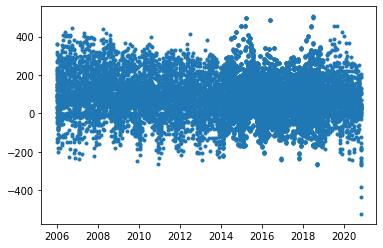

In [464]:
plt.plot(df.dispatch_date,df.num_crimes - preds,'.')

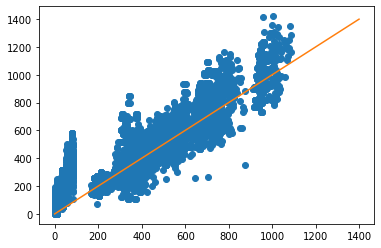

In [456]:
plt.plot(preds,df.num_crimes,'o')
xr = np.arange(0,1400)
plt.plot(xr,xr)

In [485]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(df.dispatch_date.values(),df.num_crimes - preds, statistic='mean')

TypeError: 'numpy.ndarray' object is not callable

In [480]:
xr = np.arange(len(df)+1)

In [477]:
sorted(df.dispatch_date.unique())

[numpy.datetime64('2006-01-01T00:00:00.000000000'),
 numpy.datetime64('2006-02-01T00:00:00.000000000'),
 numpy.datetime64('2006-03-01T00:00:00.000000000'),
 numpy.datetime64('2006-04-01T00:00:00.000000000'),
 numpy.datetime64('2006-05-01T00:00:00.000000000'),
 numpy.datetime64('2006-06-01T00:00:00.000000000'),
 numpy.datetime64('2006-07-01T00:00:00.000000000'),
 numpy.datetime64('2006-08-01T00:00:00.000000000'),
 numpy.datetime64('2006-09-01T00:00:00.000000000'),
 numpy.datetime64('2006-10-01T00:00:00.000000000'),
 numpy.datetime64('2006-11-01T00:00:00.000000000'),
 numpy.datetime64('2006-12-01T00:00:00.000000000'),
 numpy.datetime64('2007-01-01T00:00:00.000000000'),
 numpy.datetime64('2007-02-01T00:00:00.000000000'),
 numpy.datetime64('2007-03-01T00:00:00.000000000'),
 numpy.datetime64('2007-04-01T00:00:00.000000000'),
 numpy.datetime64('2007-05-01T00:00:00.000000000'),
 numpy.datetime64('2007-06-01T00:00:00.000000000'),
 numpy.datetime64('2007-07-01T00:00:00.000000000'),
 numpy.datet